In [1]:
import pandas as pd

In [2]:
timeseries = pd.read_parquet('../data/interim/comb_trips.gzip').set_index('started_at')

timeseries.index.name='date'
weekly = timeseries.resample('1W').count().ended_at

In [3]:
timeseries.groupby("member_casual").count()


,ended_at,start_station_id,end_station_id
member_casual,,,
casual,7312502,7166442,7137277
member,23712977,23578072,23571428
unknown,58,58,58


In [4]:
membertrips_week = timeseries[timeseries.member_casual == 'member'].resample('1W').count().ended_at
casualtrips_week = timeseries[timeseries.member_casual == 'casual'].resample('1W').count().ended_at

In [5]:
membertrips_week.name = "member trips"
casualtrips_week.name = "non-member trips"


In [6]:
weekly


date
2010-09-26     2724
2010-10-03     3200
2010-10-10     5602
2010-10-17     7595
2010-10-24     9359
              ...  
2021-12-05    54940
2021-12-12    49397
2021-12-19    48238
2021-12-26    27864
2022-01-02    22997
Freq: W-SUN, Name: ended_at, Length: 589, dtype: int64

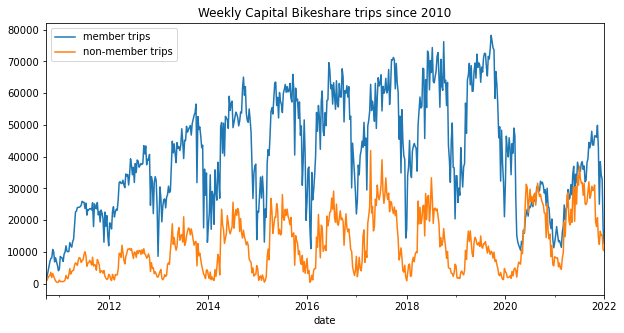

In [10]:
ax = combined_timseries = pd.merge_asof(
    membertrips_week, casualtrips_week, left_index=True, right_index=True
).plot(figsize=(10,5), title="Weekly Capital Bikeshare trips since 2010")
fig = ax.get_figure()
fig.savefig(
    "../reports/figures/weekly_trips.png", bbox_inches="tight", facecolor="w", dpi=200
)


In [11]:
casualtrips_week[casualtrips_week.argmax()]
casualtrips_week.index[casualtrips_week.argmax()]


Timestamp('2017-04-16 00:00:00', freq='W-SUN')

<AxesSubplot:xlabel='date'>

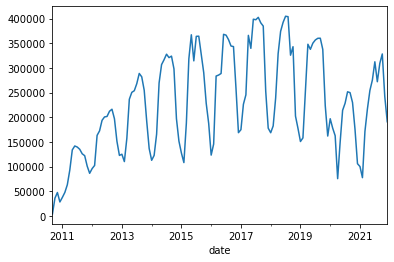

In [9]:
timeseries.resample("1M").count().ended_at.plot()
